IMPORTING THE LIBRARIES AND DATASET

In [ ]:
#importing libraries
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# #importing dataset as dataframe
# covid = pd.read_csv("/content/Covid Dataset.csv")
# covid = pd.DataFrame(covid)
# display(covid.head(10))

In [ ]:
#importing dataset as dataframe
covid = pd.read_csv("gdrive/My Drive/Machine Learning/project/Covid Dataset.csv")
covid = pd.DataFrame(covid)
display(covid.head(10))

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
5,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,Yes
6,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,...,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Yes
7,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,...,No,Yes,Yes,No,No,Yes,No,No,No,Yes
8,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Yes,...,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
9,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,...,Yes,No,No,No,No,Yes,No,No,No,Yes


DATA PREPROCESSING

In [ ]:
# create a table with data missing 
missing_values=covid.isnull().sum() # missing values

percent_missing = covid.isnull().sum()/covid.shape[0]*100 # missing value percentage

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
display(frame)

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


In [ ]:
# encoding all the categorical data into numerical form using label encoder
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()
covid['Breathing Problem']=e.fit_transform(covid['Breathing Problem'])
covid['Fever']=e.fit_transform(covid['Fever'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Running Nose']=e.fit_transform(covid['Running Nose'])
covid['Asthma']=e.fit_transform(covid['Asthma'])
covid['Chronic Lung Disease']=e.fit_transform(covid['Chronic Lung Disease'])
covid['Headache']=e.fit_transform(covid['Headache'])
covid['Heart Disease']=e.fit_transform(covid['Heart Disease'])
covid['Diabetes']=e.fit_transform(covid['Diabetes'])
covid['Hyper Tension']=e.fit_transform(covid['Hyper Tension'])
covid['Abroad travel']=e.fit_transform(covid['Abroad travel'])
covid['Contact with COVID Patient']=e.fit_transform(covid['Contact with COVID Patient'])
covid['Attended Large Gathering']=e.fit_transform(covid['Attended Large Gathering'])
covid['Visited Public Exposed Places']=e.fit_transform(covid['Visited Public Exposed Places'])
covid['Family working in Public Exposed Places']=e.fit_transform(covid['Family working in Public Exposed Places'])
covid['Wearing Masks']=e.fit_transform(covid['Wearing Masks'])
covid['Sanitization from Market']=e.fit_transform(covid['Sanitization from Market'])
covid['COVID-19']=e.fit_transform(covid['COVID-19'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Gastrointestinal ']=e.fit_transform(covid['Gastrointestinal '])
covid['Fatigue ']=e.fit_transform(covid['Fatigue '])

In [ ]:
# displaying the data after label encoding
display(covid.head(10))

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
5,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,1,1,1,0,0,0,1,0,1,1,...,1,1,0,0,1,1,1,0,0,1
7,1,1,1,0,1,1,0,0,0,1,...,0,1,1,0,0,1,0,0,0,1
8,1,1,1,0,1,0,1,0,0,1,...,1,0,1,1,1,0,0,0,0,1
9,1,1,1,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


EXPLORATORY DATA ANALYSIS(EDA)

In [ ]:
'''important information about the data such as the range of rows it has, a count of all its 
columns, the columns’s data types, and the number of non-null values contained within each'''
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non-null   int64
 10  Hyper Tension                            5434 non-null   int64
 11  Fati

In [ ]:
#describing data using statistics such as mean, median, mode and quartiles 
covid.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


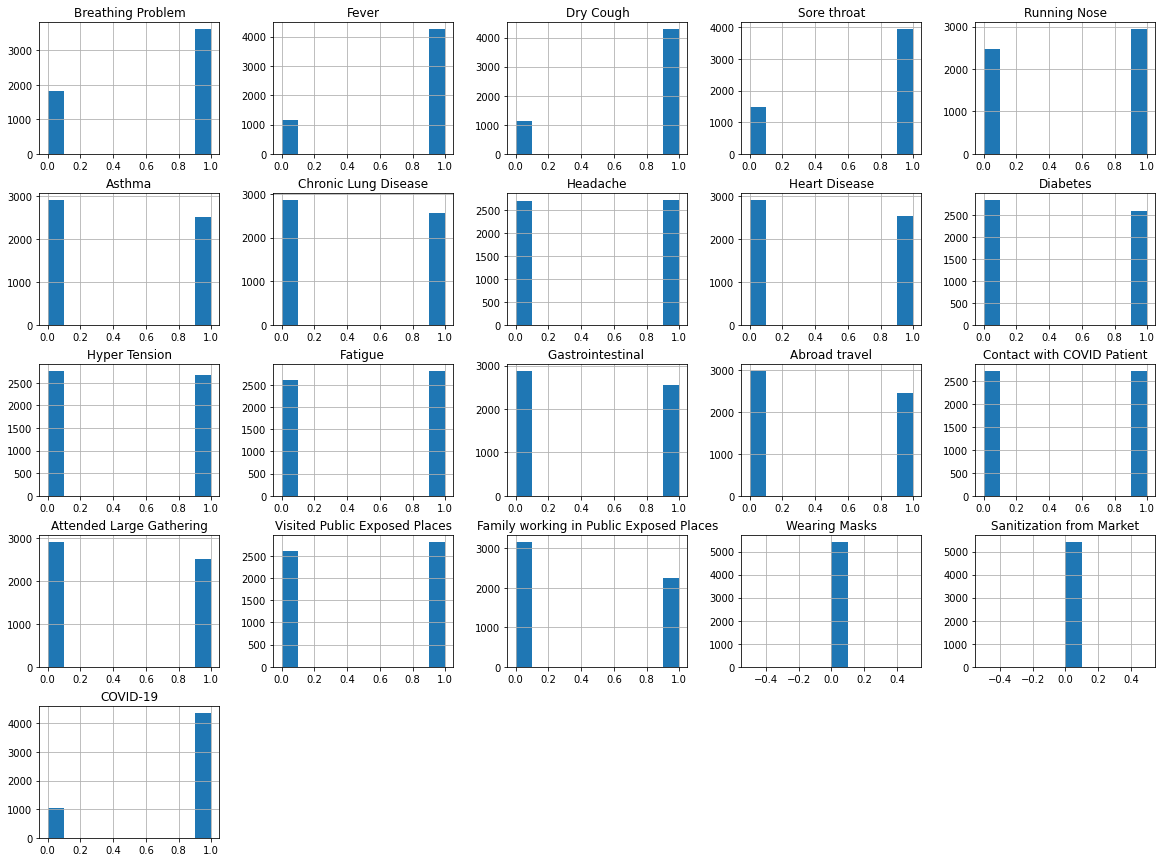

In [ ]:
# plotting the histogram of all the features in the dataset
covid.hist(figsize=(20,15));

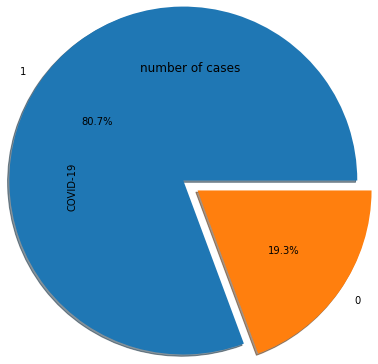

In [ ]:
# pie chart showing no of covid cases 
covid["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,radius=2 )
plt.title('number of cases');

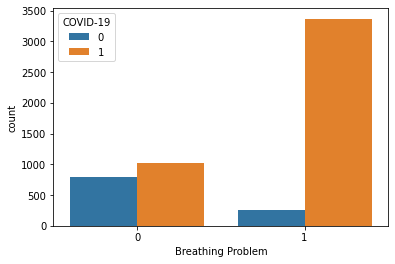

In [ ]:
sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid)

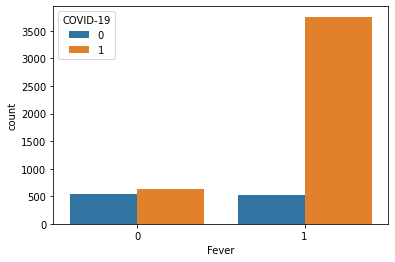

In [ ]:
sns.countplot(x='Fever',hue='COVID-19',data=covid);

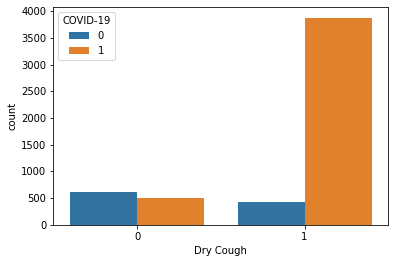

In [ ]:
sns.countplot(x='Dry Cough',hue='COVID-19',data=covid)

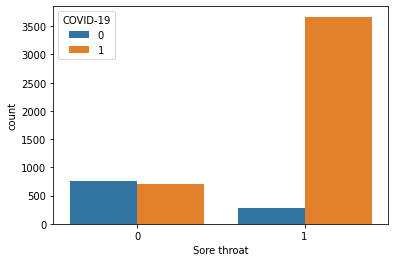

In [ ]:
sns.countplot(x='Sore throat',hue='COVID-19',data=covid)

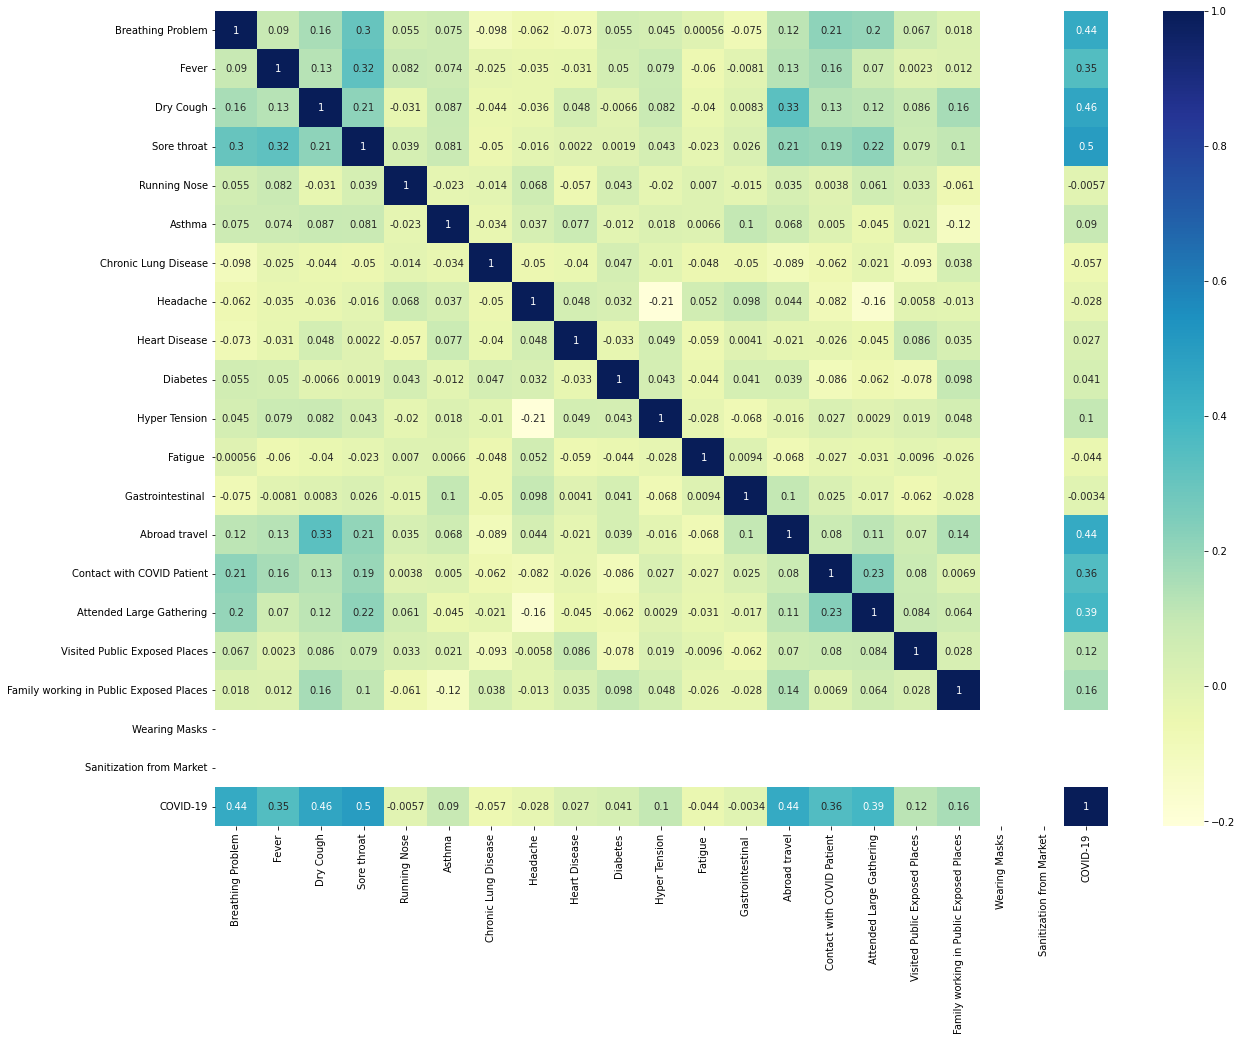

In [ ]:
# plotting correlation heatmap
plt.subplots(figsize=(20,15))
dataplot = sns.heatmap(covid.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

TRAINING THE DATASET USING DIFFERENT TYPES OF NAIVE BAYES

In [ ]:
#definining dependent and independent variables
X=covid.drop('COVID-19',axis=1)
y=covid['COVID-19']

In [ ]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state = 8)

# printing the shape of training and test data after splitting
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (4347, 20)
X_test shape: (1087, 20)
y_train shape: (4347,)
y_test shape: (1087,)


In [ ]:
#training the training data using gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
gaussian_model = GaussianNB()
gaussian_model.fit(X_train,y_train)

#Accuracy of the model on training dataset
acc_Gaussian= gaussian_model.score(X_train, y_train)*100
acc_Gaussian

77.75477340694732

In [ ]:
# prediction of the model on test dataset
pred_gaussian  =  gaussian_model.predict(X_test)
print(pred_gaussian)

[1 1 1 ... 0 1 1]


In [ ]:
# using kfold to calculate the accuracy of the model
kfold = KFold(n_splits=10,shuffle = True ,random_state=100)

results_kfold = cross_val_score(gaussian_model, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 75.86%


In [ ]:
from sklearn.metrics import log_loss

loss_gaussian = log_loss(y_test, pred_gaussian)

print(loss_gaussian)

7.657631197031717


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_gaussian = confusion_matrix(y_test, pred_gaussian)
ac_gaussian = accuracy_score(y_test,pred_gaussian)*100

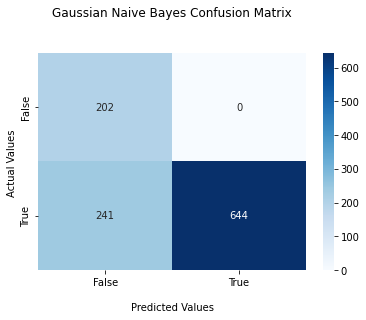

In [ ]:
import seaborn as sns

ax = sns.heatmap(cm_gaussian, fmt='.3g',annot=True, cmap='Blues')

ax.set_title('Gaussian Naive Bayes Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print("Test Accuracy: %.2f%%" % (ac_gaussian)) 

Test Accuracy: 77.83%


In [ ]:
print(classification_report(y_test, pred_gaussian))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63       202
           1       1.00      0.73      0.84       885

    accuracy                           0.78      1087
   macro avg       0.73      0.86      0.73      1087
weighted avg       0.90      0.78      0.80      1087



In [ ]:
#training the training data using Multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
multinomial_model = MultinomialNB()
multinomial_model.fit(X_train,y_train)

#Accuracy of the model on training dataset
acc_Multinomial= multinomial_model.score(X_train, y_train)*100
acc_Multinomial

86.91051299746952

In [ ]:
# prediction of the model on test dataset
pred_multinomial  =  multinomial_model.predict(X_test)
print(pred_multinomial)

[1 1 1 ... 1 1 1]


In [ ]:
# using kfold to calculate the accuracy of the model
kfold = KFold(n_splits=10,shuffle = True ,random_state=100)

results_kfold = cross_val_score(multinomial_model, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 87.23%


In [ ]:
from sklearn.metrics import log_loss

loss_multinomial = log_loss(y_test, pred_multinomial)

print(loss_multinomial)

4.226080233880031


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_multinomial = confusion_matrix(y_test, pred_multinomial)
ac_multinomial = accuracy_score(y_test,pred_multinomial)*100

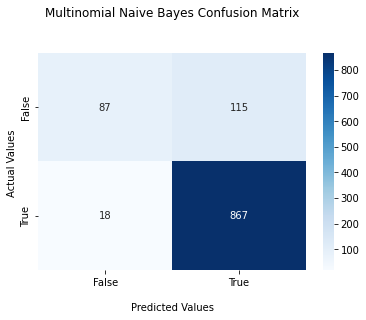

In [ ]:
import seaborn as sns

ax = sns.heatmap(cm_multinomial, fmt='.3g',annot=True, cmap='Blues')

ax.set_title('Multinomial Naive Bayes Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# showing the accurracy of the model on test dataset
print("Test Accuracy: %.2f%%" % (ac_multinomial)) 

Test Accuracy: 87.76%


In [ ]:
print(classification_report(y_test, pred_multinomial))

              precision    recall  f1-score   support

           0       0.83      0.43      0.57       202
           1       0.88      0.98      0.93       885

    accuracy                           0.88      1087
   macro avg       0.86      0.71      0.75      1087
weighted avg       0.87      0.88      0.86      1087



In [ ]:
#training the training data using Bernoulli naive bayes
from sklearn.naive_bayes import BernoulliNB
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train,y_train)

#Accuracy of the model on training dataset
acc_bernoulli= bernoulli_model.score(X_train, y_train)*100
acc_bernoulli

96.59535311709226

In [ ]:
# showing the prediction of the model on test data
pred_bernoulli  =  bernoulli_model.predict(X_test)
print(pred_bernoulli)

[1 1 1 ... 1 1 1]


In [ ]:
# using kfold to calculate the accuracy of the model
kfold = KFold(n_splits=10,shuffle = True ,random_state=100)

results_kfold = cross_val_score(bernoulli_model, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 96.52%


In [ ]:
# log loss 
from sklearn.metrics import log_loss

loss_bernoulli = log_loss(y_test, pred_bernoulli, eps=1e-15)

print(loss_bernoulli)

1.4298702168297033


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_bernoulli = confusion_matrix(y_test, pred_bernoulli)
ac_bernoulli = accuracy_score(y_test,pred_bernoulli)*100

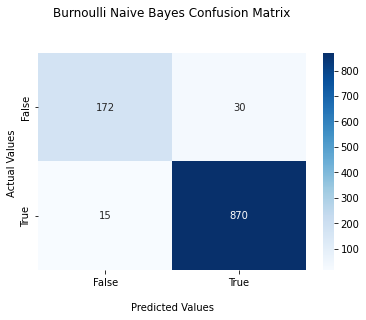

In [ ]:
import seaborn as sns

ax = sns.heatmap(cm_bernoulli, fmt='.3g',annot=True, cmap='Blues')

ax.set_title('Burnoulli Naive Bayes Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# classification report showing the precision, recall, f1 score and support 
print(classification_report(y_test, pred_bernoulli))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       202
           1       0.97      0.98      0.97       885

    accuracy                           0.96      1087
   macro avg       0.94      0.92      0.93      1087
weighted avg       0.96      0.96      0.96      1087



RESULTS

In [ ]:
models = pd.DataFrame({
    'Model': ['GaussianNB', 'MultinomialNB', 'BernoulliNB'],
    'Accuracy': [ac_gaussian , ac_multinomial , ac_bernoulli]})
models.sort_values(by='Accuracy', ascending=True)

,Model,Accuracy
0,GaussianNB,77.828887
1,MultinomialNB,87.764489
2,BernoulliNB,95.860166


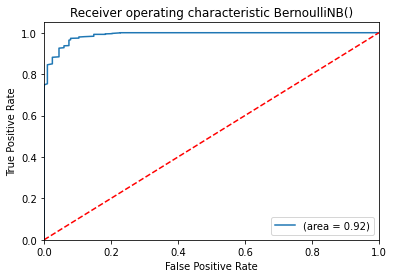

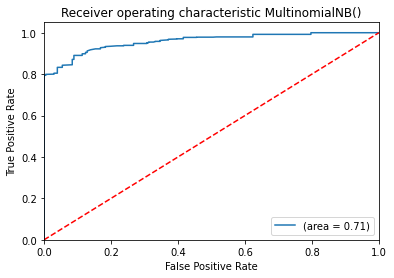

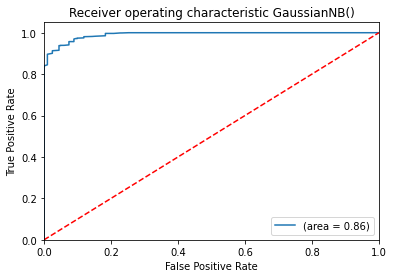

In [ ]:
# plot roc curve of all the naive bayes to compare the result
from sklearn.metrics import roc_curve, auc, roc_auc_score,plot_precision_recall_curve
def getStatsFromModel(model):
  
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver operating characteristic {model}')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

getStatsFromModel(bernoulli_model)
getStatsFromModel(multinomial_model)
getStatsFromModel(gaussian_model)